Importações

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker



Renomeando os dados

In [43]:

arquivo = "pam_ibge.csv"

pam_ibge = pd.read_csv(arquivo)

pam_ibge.head(2)


,NC,NN,MN,V,D1C,D1N,D2N,D3N,D4N
0,6,Município,Hectares,19002,3555000,Tupã (SP),Área plantada ou destinada à colheita,2015,Total
1,6,Município,Hectares,250,3555000,Tupã (SP),Área plantada ou destinada à colheita,2015,Abacate


In [44]:
pam_ibge.columns

Index(['NC', 'NN', 'MN', 'V', 'D1C', 'D1N', 'D2N', 'D3N', 'D4N'], dtype='object')

In [45]:
pam_ibge.rename(columns={'NC': 'Nível Territorial (Código)', 'NN': 'Nível Territorial', 'MN': 'Unidade de Medida', 'V':'Valor', 
                         'D1C': 'Município (Código)', 'D1N': 'Município', 'D2N': 'Variável', 'D3N': 'Ano',
                           'D4N':'Produto das lavouras temporárias e permanentes'}, inplace=True)
pam_ibge.head(2)

,Nível Territorial (Código),Nível Territorial,Unidade de Medida,Valor,Município (Código),Município,Variável,Ano,Produto das lavouras temporárias e permanentes
0,6,Município,Hectares,19002,3555000,Tupã (SP),Área plantada ou destinada à colheita,2015,Total
1,6,Município,Hectares,250,3555000,Tupã (SP),Área plantada ou destinada à colheita,2015,Abacate


In [46]:
pam_ibge.columns

Index(['Nível Territorial (Código)', 'Nível Territorial', 'Unidade de Medida',
       'Valor', 'Município (Código)', 'Município', 'Variável', 'Ano',
       'Produto das lavouras temporárias e permanentes'],
      dtype='object')

Alterando o tipos de dados

In [47]:
pam_ibge.dtypes

Nível Territorial (Código)                         int64
Nível Territorial                                 object
Unidade de Medida                                 object
Valor                                             object
Município (Código)                                 int64
Município                                         object
Variável                                          object
Ano                                                int64
Produto das lavouras temporárias e permanentes    object
dtype: object

In [48]:
pam_ibge["Nível Territorial (Código)"] = (pam_ibge["Nível Territorial (Código)"].astype(str))
pam_ibge["Valor"] = pd.to_numeric(pam_ibge["Valor"], errors="coerce")
pam_ibge["Município (Código)"] = (pam_ibge["Município (Código)"].astype(str))
pam_ibge["Município"] = (pam_ibge["Município"].astype(str))
pam_ibge['Ano'] = pam_ibge['Ano'].astype(int)


In [49]:
pam_ibge.dtypes

Nível Territorial (Código)                         object
Nível Territorial                                  object
Unidade de Medida                                  object
Valor                                             float64
Município (Código)                                 object
Município                                          object
Variável                                           object
Ano                                                 int64
Produto das lavouras temporárias e permanentes     object
dtype: object

In [50]:
pam_ibge.head(10)

,Nível Territorial (Código),Nível Territorial,Unidade de Medida,Valor,Município (Código),Município,Variável,Ano,Produto das lavouras temporárias e permanentes
0,6,Município,Hectares,19002.0,3555000,Tupã (SP),Área plantada ou destinada à colheita,2015,Total
1,6,Município,Hectares,250.0,3555000,Tupã (SP),Área plantada ou destinada à colheita,2015,Abacate
2,6,Município,Hectares,NaN,3555000,Tupã (SP),Área plantada ou destinada à colheita,2015,Abacaxi*
3,6,Município,Hectares,NaN,3555000,Tupã (SP),Área plantada ou destinada à colheita,2015,Açaí
4,6,Município,Hectares,NaN,3555000,Tupã (SP),Área plantada ou destinada à colheita,2015,Alfafa fenada
5,6,Município,Hectares,NaN,3555000,Tupã (SP),Área plantada ou destinada à colheita,2015,Algodão arbóreo (em caroço)
6,6,Município,Hectares,NaN,3555000,Tupã (SP),Área plantada ou destinada à colheita,2015,Algodão herbáceo (em caroço)
7,6,Município,Hectares,NaN,3555000,Tupã (SP),Área plantada ou destinada à colheita,2015,Alho
8,6,Município,Hectares,4000.0,3555000,Tupã (SP),Área plantada ou destinada à colheita,2015,Amendoim (em casca)
9,6,Município,Hectares,10.0,3555000,Tupã (SP),Área plantada ou destinada à colheita,2015,Arroz (em casca)


Evolução anual dos produtos de lavouras temporárias e permantes em Toneladas da CATI - Coordenadoria de Assistência Técnica Integral (Regional Tupã)

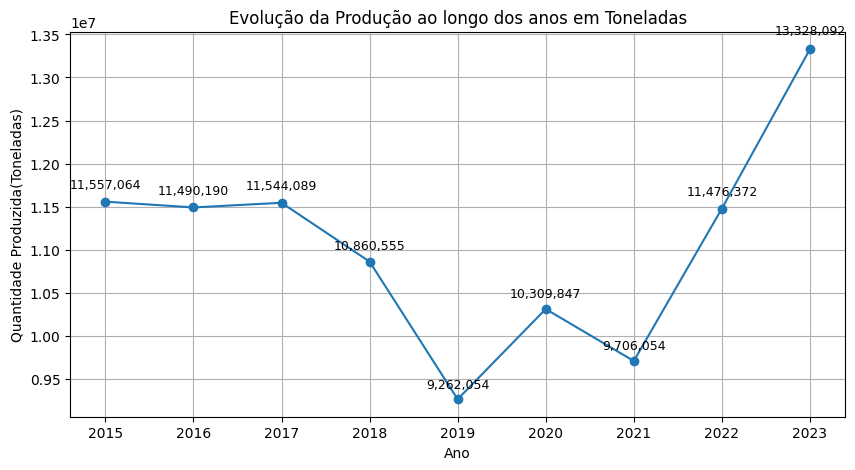

In [51]:
evolucao = pam_ibge.groupby("Ano")["Valor"].sum()
plt.figure(figsize=(10,5))
plt.plot(evolucao.index, evolucao.values, marker = 'o') # Grafico de linhas para acompanhar a evolução ao longo dos anos
plt.title("Evolução da Produção ao longo dos anos em Toneladas")
plt.xlabel("Ano")
plt.ylabel("Quantidade Produzida(Toneladas)")
plt.grid(True)

#zip: ele serve para juntar duas ou mais sequencias de elemento, transformando em X, Y e iterando sobre eles, neste caso o ANO = ; VALOR = Y 
for x, y in zip(evolucao.index, evolucao.values): 
    plt.text(x , y + y*0.01, f"{y:,.0f}", ha="center", va="bottom", fontsize=9)


plt.show()

In [52]:
#validando 
soma_por_ano = pam_ibge.groupby("Ano")["Valor"].sum().reset_index()
print(soma_por_ano)

# Total geral
total_geral = pam_ibge["Valor"].sum()
print(f"Total geral: {total_geral:,.0f}")

    Ano       Valor
0  2015  11557064.0
1  2016  11490190.0
2  2017  11544089.0
3  2018  10860555.0
4  2019   9262054.0
5  2020  10309847.0
6  2021   9706054.0
7  2022  11476372.0
8  2023  13328092.0
Total geral: 99,534,317


In [53]:
#Evolução das culturas ao longo dos anos(Cana de Açúcar)
produtos_lavouras = pam_ibge[
    (pam_ibge["Produto das lavouras temporárias e permanentes"].isin(["Cana-de-açúcar"])) &
    (pam_ibge["Variável"] == "Quantidade produzida")]

soma_por_ano = produtos_lavouras.groupby("Ano")["Valor"].sum().reset_index()
print(soma_por_ano)


    Ano      Valor
0  2015  6206855.0
1  2016  6583366.0
2  2017  6682616.0
3  2018  6149794.0
4  2019  4834867.0
5  2020  5141417.0
6  2021  4144854.0
7  2022  5088355.0
8  2023  5491975.0


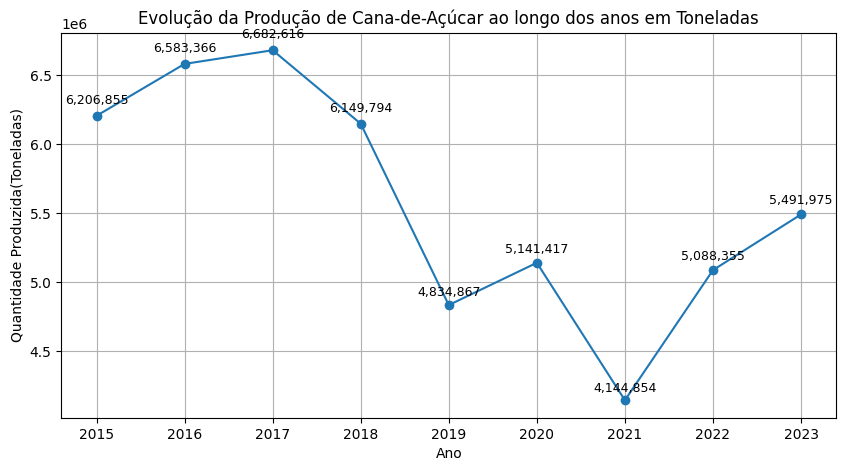

In [54]:
#Evolução das culturas ao longo dos anos(Cana de Açúcar)
#gráfico
evolucao_cana = soma_por_ano.groupby("Ano")["Valor"].sum()
plt.figure(figsize=(10,5))
plt.plot(evolucao_cana.index, evolucao_cana.values, marker = 'o')
plt.title("Evolução da Produção de Cana-de-Açúcar ao longo dos anos em Toneladas")
plt.xlabel("Ano")
plt.ylabel("Quantidade Produzida(Toneladas)")
plt.grid(True)

#zip: ele serve para juntar duas ou mais sequencias de elemento, transformando em X, Y e iterando sobre eles, neste caso o ANO = ; VALOR = Y 
for x, y in zip(evolucao_cana.index, evolucao_cana.values): 
    plt.text(x , y + y*0.01, f"{y:,.0f}", ha="center", va="bottom", fontsize=9)


plt.show()

Top 10 produtos das Lavouras de todos os municipios

In [55]:
#top 10 produtos mais produzidos
qutd_produzida1 = pam_ibge[pam_ibge["Variável"] == "Quantidade produzida"]
prod_agrupados = qutd_produzida1.groupby("Produto das lavouras temporárias e permanentes")["Valor"].sum().sort_values(ascending=False)
prod_agrupados.head(10)


Produto das lavouras temporárias e permanentes
Cana-de-açúcar            50324099.0
Mandioca                   1207930.0
Amendoim (em casca)         712722.0
Milho (em grão)             165060.0
Melancia                    116675.0
Soja (em grão)              102370.0
Mamão                        69473.0
Batata-doce                  59275.0
Abacate                      45494.0
Café (em grão) Arábica       44376.0
Name: Valor, dtype: float64

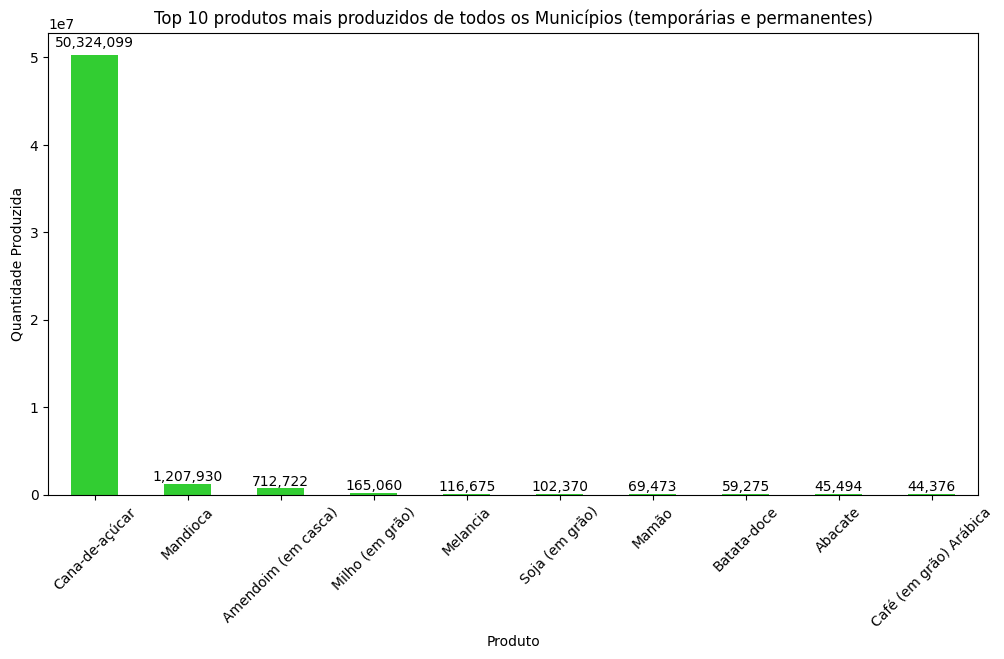

In [56]:

ax = prod_agrupados.head(10).plot(
    kind="bar",
    figsize=(12,6),
    color="#32CD32",
    title="Top 10 produtos mais produzidos de todos os Municípios (temporárias e permanentes)"
)

plt.ylabel("Quantidade Produzida")
plt.xlabel("Produto")
plt.xticks(rotation=45)

# Adicionar os valores no topo das barras
for i, v in enumerate(prod_agrupados.head(10)):
    ax.text(i, v + v*0.01, f"{v:,.0f}", ha='center', va='bottom')

plt.show()


Top 5 municipios da Regional que tem mais produção em Cana-de-açucar, Mandioca, Amendoim(em casca)

In [57]:
#Filtrando para pegar somemte Cana-de-açucar, Mandioca e Amendoim em Toneladas 
produtos_lavouras = pam_ibge[
    (pam_ibge["Produto das lavouras temporárias e permanentes"].isin(["Cana-de-açúcar", "Mandioca", "Amendoim (em casca)"])) &
    (pam_ibge["Variável"] == "Quantidade produzida")]

# Agrupar por município e somar os valores
lavouras_agrupadas = produtos_lavouras.groupby("Município")["Valor"].sum().reset_index()
# Selecionar os 5 maiores produtores em Toneladas 
# nlargest() serve para pegar os 5 maiores valores
top5 = lavouras_agrupadas.nlargest(5, "Valor")
print(top5)


           Município      Valor
2   Herculândia (SP)  7289654.0
13         Tupã (SP)  6405644.0
9       Queiroz (SP)  6035664.0
7       Parapuã (SP)  5543271.0
3         Iacri (SP)  5311887.0


In [58]:
#validando os produtos da lavouras (Cana, Mandioca e Amendoim)
produtos_lavouras = pam_ibge[
    (pam_ibge["Produto das lavouras temporárias e permanentes"].isin(["Cana-de-açúcar", "Mandioca", "Amendoim (em casca)"])) &
    (pam_ibge["Variável"] == "Quantidade produzida")]["Produto das lavouras temporárias e permanentes"].unique()
produtos_lavouras

array(['Amendoim (em casca)', 'Cana-de-açúcar', 'Mandioca'], dtype=object)

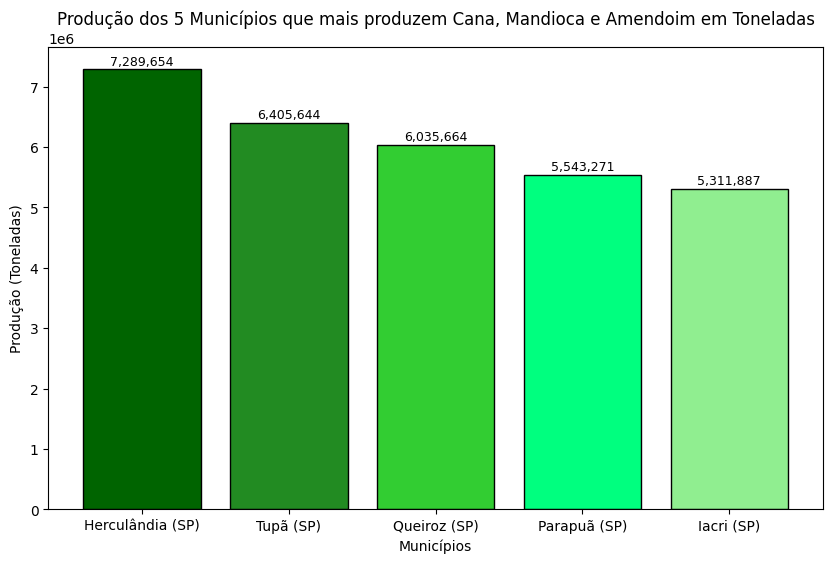

In [59]:
# Dados
labels = top5["Município"]
sizes = top5["Valor"]

# Paleta de cores suaves
colors = ["#006400", "#228B22", "#32CD32", "#00FF7F", "#90EE90"]  # tons verdes suaves

# Criar gráfico de barras
plt.figure(figsize=(10,6))
plt.bar(labels, sizes, color=colors, edgecolor="black")

# Adicionar título e rótulos
plt.title("Produção dos 5 Municípios que mais produzem Cana, Mandioca e Amendoim em Toneladas")
plt.xlabel("Municípios")
plt.ylabel("Produção (Toneladas)")

# Mostrar valores acima das barras
for i, v in enumerate(sizes):
    plt.text(i, v + (max(sizes)*0.01), f"{v:,.0f}", ha="center", fontsize=9)

plt.show()



Produtividade e eficiência: Área plantada x Rendimento médio

In [60]:

#filtrando, pegando somente "Cana-de-açúcar", "Mandioca", "Amendoim (em casca)" dentro da variavel Produto das lavouras temporárias e permanentes
produtos_lavouras = pam_ibge[(pam_ibge["Produto das lavouras temporárias e permanentes"].isin(["Cana-de-açúcar", "Mandioca", "Amendoim (em casca)"]))]

#Separando a area plantada e rendimento medio
area_plantada = pam_ibge[pam_ibge["Variável"] == "Área plantada ou destinada à colheita"]["Valor"]
rendimento_medio = pam_ibge[pam_ibge["Variável"] == "Rendimento médio da produção"]["Valor"]
#renomeando
df_produtividade = produtos_lavouras.pivot_table(
    index="Município",
    columns="Variável",
    values="Valor"
).reset_index()

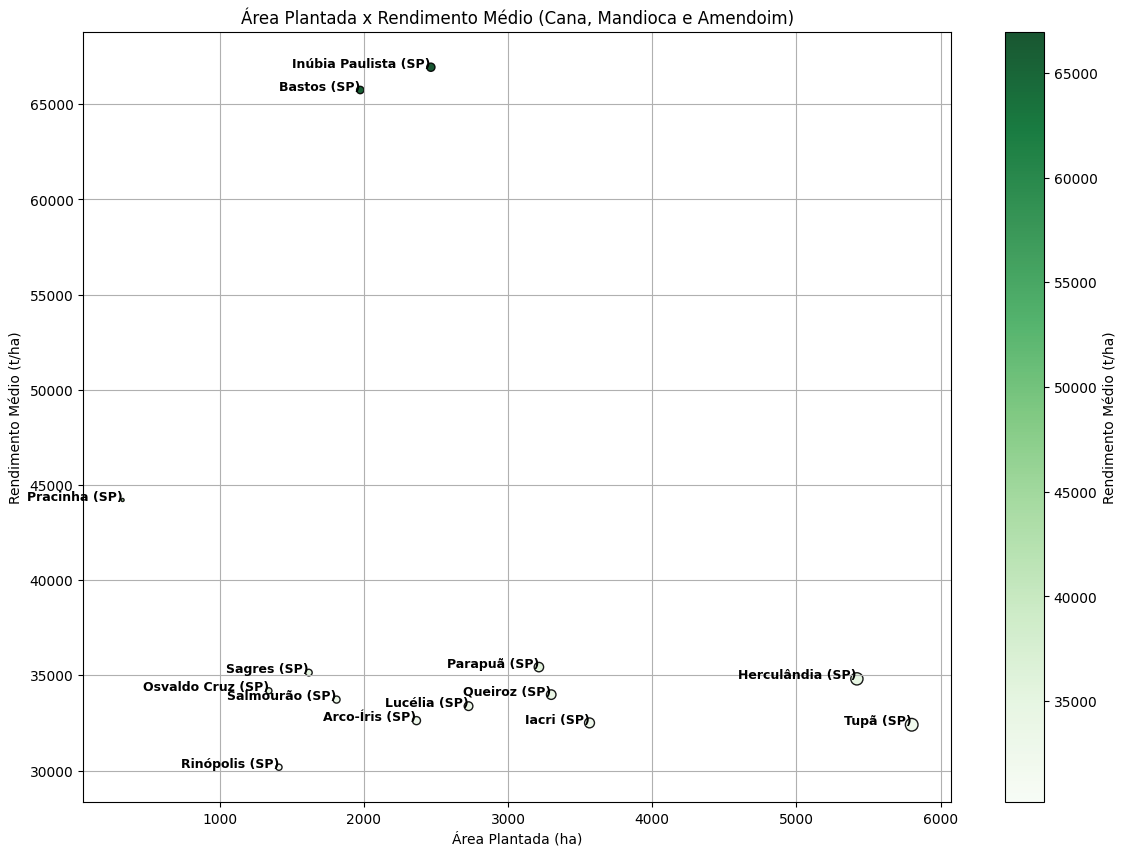

In [61]:
plt.figure(figsize=(14,10))

# Tamanho e cor dos pontos
sizes = df_produtividade["Área plantada ou destinada à colheita"] / 70 #tamanho dos pontos no grafico
colors = df_produtividade["Rendimento médio da produção"]

scatter = plt.scatter(
    df_produtividade["Área plantada ou destinada à colheita"],
    df_produtividade["Rendimento médio da produção"],
    s=sizes,
    c=colors,
    cmap="Greens", 
    alpha=0.9, 
    edgecolors="black"
)#o SCATTER é utilizado para gráfico de dispersão, monstra a relação entre duas váriaveis, plotando cada observação no gráfico. 

# Adicionar legenda de cores
cbar = plt.colorbar(scatter)
cbar.set_label("Rendimento Médio (t/ha)") #nome da barra 

plt.title("Área Plantada x Rendimento Médio (Cana, Mandioca e Amendoim)")
plt.xlabel("Área Plantada (ha)")
plt.ylabel("Rendimento Médio (t/ha)")
plt.grid(True)

# Adicionar nomes dos 14 municipios 
top_municipios = df_produtividade.nlargest(14, "Área plantada ou destinada à colheita")

for i, row in top_municipios.iterrows():
    plt.text(
        row["Área plantada ou destinada à colheita"],
        row["Rendimento médio da produção"],
        row["Município"],
        fontsize=9,
        weight="bold",
        ha="right"
    )

plt.show()



Valor econômico: Quais culturas tiveram um gasto de produção maior na Regional ?

In [62]:
#Valor da produção em R$
valo_produzido = pam_ibge[(pam_ibge["Unidade de Medida"] == "Mil Reais") & (pam_ibge["Produto das lavouras temporárias e permanentes"] != "Total")]
prod_agrupados2 = valo_produzido.groupby("Produto das lavouras temporárias e permanentes")["Valor"].sum().sort_values(ascending=False)
prod_agrupados2.head(14)


Produto das lavouras temporárias e permanentes
Cana-de-açúcar                4384498.0
Amendoim (em casca)           1961575.0
Mandioca                       837548.0
Café (em grão) Arábica         360717.0
Café (em grão) Total           360717.0
Soja (em grão)                 188708.0
Milho (em grão)                162483.0
Borracha (látex coagulado)     102804.0
Melancia                       101465.0
Mamão                           76120.0
Batata-doce                     75687.0
Maracujá                        73374.0
Abacate                         67264.0
Banana (cacho)                  50783.0
Name: Valor, dtype: float64

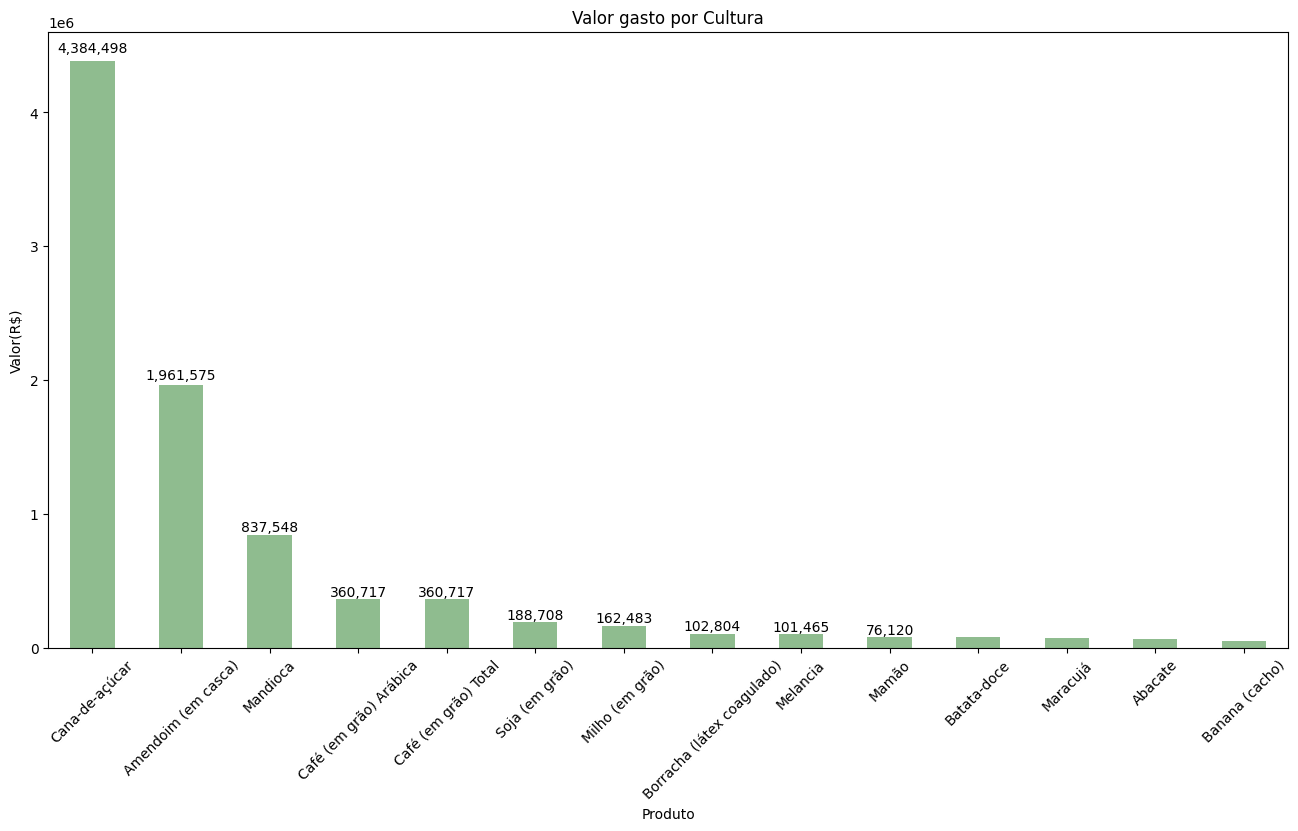

In [63]:

ax = prod_agrupados2.head(14).plot(
    kind="bar",
    figsize=(16,8),
    color="#8FBC8F",
    title="Valor gasto por Cultura"
)

plt.ylabel("Valor(R$)")
plt.xlabel("Produto")
plt.xticks(rotation=45)

# Adicionar os valores no topo das barras
for i, v in enumerate(prod_agrupados2.head(10)):
    ax.text(i, v + v*0.01, f"{v:,.0f}", ha='center', va='bottom')

plt.show()


Estimativa de Lucro nos 14 municípios da Regional, Cana-de-açúcar, Amendoim e Mandioca 

In [64]:
# Quantidade produzida (em toneladas)
quantidades = prod_agrupados.iloc[:3]

# Valor da produção segundo IBGE (em R$)
valores_ibge = prod_agrupados2.iloc[:3]

# Preço médio fixo definido ("Amendoim (em casca)","Cana-de-açúcar", "Mandioca") em (R$/t)
precos_fixos = [9930, 170, 632]  

# Criar DataFrame
df = pd.DataFrame({
    "Produto": ["Amendoim (em casca)", "Cana-de-açúcar", "Mandioca"],
    "Quantidade_Produzida(t)": quantidades,
    "Valor_Producao_IBGE(R$)": valores_ibge,
    "Preco_Medio_Fixo(R$/t)": precos_fixos, 

})

# Receita estimada com base no preço médio fixo
df["Receita_Estimada(R$)"] = df["Quantidade_Produzida(t)"] * df["Preco_Medio_Fixo(R$/t)"]

df.head()


,Produto,Quantidade_Produzida(t),Valor_Producao_IBGE(R$),Preco_Medio_Fixo(R$/t),Receita_Estimada(R$)
Produto das lavouras temporárias e permanentes,,,,,
Amendoim (em casca),Amendoim (em casca),712722.0,1961575.0,9930,7.077329e+09
Cana-de-açúcar,Cana-de-açúcar,50324099.0,4384498.0,170,8.555097e+09
Mandioca,Mandioca,1207930.0,837548.0,632,7.634118e+08


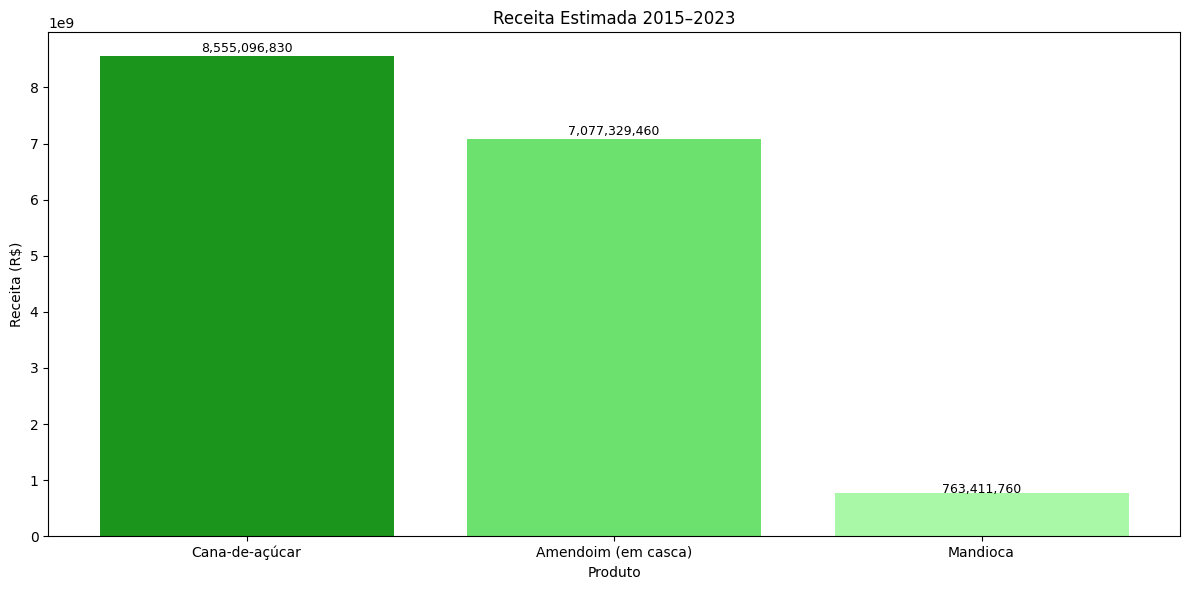

In [65]:
# Ordenar decrescente pela Receita Real (IBGE)
df_sorted = df.sort_values(by="Receita_Estimada(R$)", ascending=False)

# Dados
produtos = df_sorted["Produto"]
receita_real = df_sorted["Receita_Estimada(R$)"]

plt.figure(figsize=(12,6))
plt.bar(produtos, receita_real, color=["#1B951B","#6DE16D","#A8F8A8", ])

# Títulos e rótulos
plt.title("Receita Estimada 2015–2023")
plt.ylabel("Receita (R$)")
plt.xlabel("Produto")

# Colocar valores em cima das barras
for i, v in enumerate(receita_real):
    plt.text(i, v + (v*0.01), f"{v:,.0f}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()


In [66]:
# Dataframe com as culturas Cana, Amendoim e Mandioca que mais movimentam a economia nos 14 municipios
# Lista de culturas que você quer analisar
culturas = ["Amendoim (em casca)", "Cana-de-açúcar", "Mandioca"]
# Preços fixos em R$/t (na mesma ordem das culturas)
precos_fixos = {
    "Amendoim (em casca)": 9930,
    "Cana-de-açúcar": 170,
    "Mandioca": 632
}
# Filtrar apenas culturas de interesse
df_municipios = pam_ibge[
    (pam_ibge["Produto das lavouras temporárias e permanentes"].isin(culturas)) &
    (pam_ibge["Ano"] == 2023) &  # pode ajustar o ano
    (pam_ibge["Variável"] == "Quantidade produzida")
][["Município", "Produto das lavouras temporárias e permanentes", "Valor"]]
# Juntar com o valor da produção (R$) do IBGE
df_valor = pam_ibge[
    (pam_ibge["Produto das lavouras temporárias e permanentes"].isin(culturas)) &
    (pam_ibge["Ano"] == 2023) &  # pode ajustar o ano
    (pam_ibge["Unidade de Medida"] == "Mil Reais")
][["Município", "Produto das lavouras temporárias e permanentes", "Valor"]]
# Renomear colunas para juntar
df_municipios = df_municipios.rename(columns={"Valor": "Quantidade_Produzida(t)"})
# Unir os dois DataFrames
df_final = pd.merge(
    df_municipios,
    df_valor,
    on=["Município", "Produto das lavouras temporárias e permanentes"],
    how="left"
)
# Adicionar preço fixo
df_final["Preco_Medio_Fixo(R$/t)"] = df_final["Produto das lavouras temporárias e permanentes"].map(precos_fixos)
# Receita estimada com base no preço fixo
df_final["Receita_Estimada(R$)"] = df_final["Quantidade_Produzida(t)"] * df_final["Preco_Medio_Fixo(R$/t)"]
# Ordenar para facilitar leitura
df_final = df_final.sort_values(by=["Produto das lavouras temporárias e permanentes", "Município", "Receita_Estimada(R$)"], ascending=False)
df_final.head(100)   # mostra as primeiras linhas


,Município,Produto das lavouras temporárias e permanentes,Quantidade_Produzida(t),Valor,Preco_Medio_Fixo(R$/t),Receita_Estimada(R$)
2,Tupã (SP),Mandioca,81000.0,77679.0,632,51192000.0
41,Salmourão (SP),Mandioca,4851.0,7034.0,632,3065832.0
38,Sagres (SP),Mandioca,1500.0,2100.0,632,948000.0
35,Rinópolis (SP),Mandioca,13000.0,12467.0,632,8216000.0
32,Queiroz (SP),Mandioca,6750.0,9484.0,632,4266000.0
29,Pracinha (SP),Mandioca,2379.0,3331.0,632,1503528.0
26,Parapuã (SP),Mandioca,37625.0,52863.0,632,23779000.0
23,Osvaldo Cruz (SP),Mandioca,204.0,286.0,632,128928.0
20,Lucélia (SP),Mandioca,431.0,603.0,632,272392.0
17,Inúbia Paulista (SP),Mandioca,NaN,NaN,632,NaN


In [67]:
#validando
df_municipios = pam_ibge[
    (pam_ibge["Produto das lavouras temporárias e permanentes"].isin(culturas)) &
    (pam_ibge["Ano"] == 2023) &  # pode ajustar o ano
    (pam_ibge["Variável"] == "Quantidade produzida")
][["Município", "Produto das lavouras temporárias e permanentes", "Valor"]]["Produto das lavouras temporárias e permanentes"].unique()
df_municipios

array(['Amendoim (em casca)', 'Cana-de-açúcar', 'Mandioca'], dtype=object)

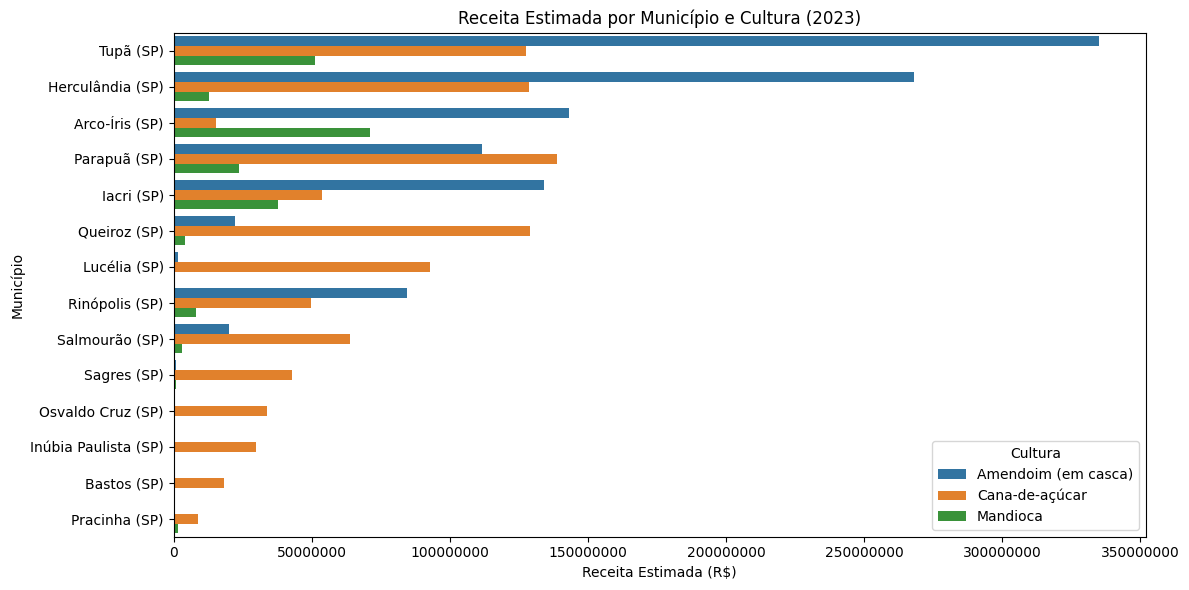

In [68]:
# Ordenar por Receita para ficar mais legível
df_plot = df_final.sort_values("Receita_Estimada(R$)", ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(
    data=df_plot,
    x="Receita_Estimada(R$)",
    y="Município",
    hue="Produto das lavouras temporárias e permanentes"
)

plt.title("Receita Estimada por Município e Cultura (2023)")
plt.xlabel("Receita Estimada (R$)")
plt.ylabel("Município")
plt.legend(title="Cultura")

# >>> Formatando eixo X para não ter separador
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x)}"))

plt.tight_layout()
plt.show()


Visualização espacial(Mapas): Mapa coroplético mostrando concentração da produção da mandioca, cana e amendoim na CATI Regional de Tupã/SP.

In [69]:
# Carregar shapefile
mapa = gpd.read_file("SP_Municipios_2024/SP_Municipios_2024.shp")

# Filtrar apenas municípios do estado de São Paulo
mapa_sp = mapa[mapa["NM_UF"] == "São Paulo"]

# Lista com os 14 municípios de interesse
municipios_interesse = [
    "Inúbia Paulista", "Bastos", "Tupã", "Herculândia", "Sagres",
    "Osvaldo Cruz", "Salmourão", "Arco-Íris", "Lucélia", "Queiroz",
    "Iacri", "Parapuã", "Rinópolis", "Pracinha"
]

# Filtrar apenas os 14 municípios
mapa_14 = mapa_sp[mapa_sp["NM_MUN"].isin(municipios_interesse)]

print(mapa_14[["NM_MUN", "NM_UF"]])


              NM_MUN      NM_UF
5          Salmourão  São Paulo
10      Osvaldo Cruz  São Paulo
29           Lucélia  São Paulo
55            Sagres  São Paulo
56             Iacri  São Paulo
79          Pracinha  São Paulo
109  Inúbia Paulista  São Paulo
226      Herculândia  São Paulo
377        Rinópolis  São Paulo
421          Parapuã  São Paulo
430             Tupã  São Paulo
497           Bastos  São Paulo
512          Queiroz  São Paulo
605        Arco-Íris  São Paulo


In [70]:
print(mapa_sp.columns)


Index(['CD_MUN', 'NM_MUN', 'CD_RGI', 'NM_RGI', 'CD_RGINT', 'NM_RGINT', 'CD_UF',
       'NM_UF', 'SIGLA_UF', 'CD_REGIA', 'NM_REGIA', 'SIGLA_RG', 'CD_CONCU',
       'NM_CONCU', 'AREA_KM2', 'geometry'],
      dtype='object')


<Axes: >

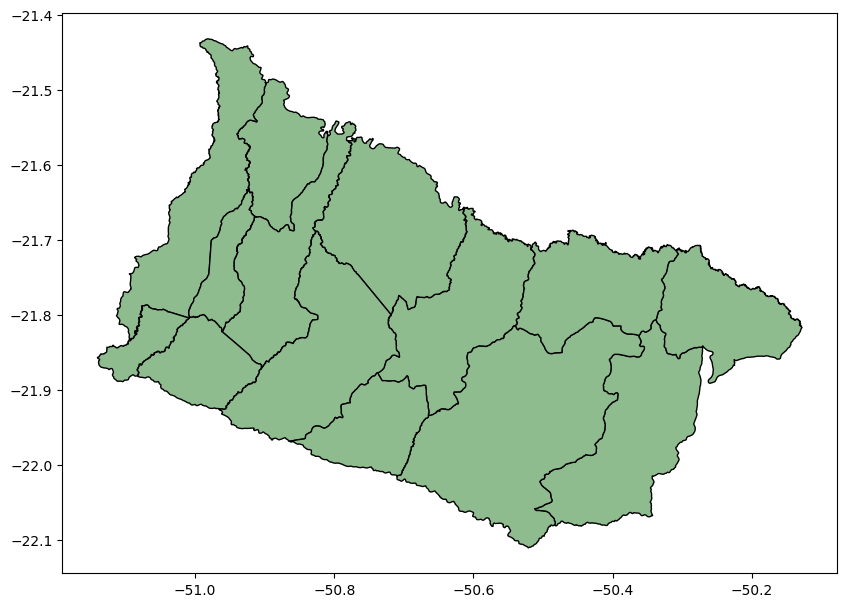

In [71]:
mapa_14.plot(figsize=(10, 8), edgecolor="black", color="#8FBC8F")

In [72]:
# Converter para string e garantir 7 dígitos
mapa["CD_MUN"] = mapa["CD_MUN"].astype(str).str.zfill(7)
pam_ibge["Município (Código)"] = pam_ibge["Município (Código)"].astype(str).str.zfill(7)

# Merge pelo código do município
gdf_pam = mapa.merge(
    pam_ibge,
    left_on="CD_MUN",
    right_on="Município (Código)",
    how="inner"
)

gdf_pam.head(2)


,CD_MUN,NM_MUN,CD_RGI,NM_RGI,CD_RGINT,NM_RGINT,CD_UF,NM_UF,SIGLA_UF,CD_REGIA,...,geometry,Nível Territorial (Código),Nível Territorial,Unidade de Medida,Valor,Município (Código),Município,Variável,Ano,Produto das lavouras temporárias e permanentes
0,3545100,Salmourão,350019,Adamantina - Lucélia,3505,Presidente Prudente,35,São Paulo,SP,3,...,"POLYGON ((-50.86984 -21.49625, -50.86915 -21.4...",6,Município,Hectares,6904.0,3545100,Salmourão (SP),Área plantada ou destinada à colheita,2015,Total
1,3545100,Salmourão,350019,Adamantina - Lucélia,3505,Presidente Prudente,35,São Paulo,SP,3,...,"POLYGON ((-50.86984 -21.49625, -50.86915 -21.4...",6,Município,Hectares,NaN,3545100,Salmourão (SP),Área plantada ou destinada à colheita,2015,Abacate


In [73]:
#validando a quantidade produzida e o ano
cana = qutd_produzida1[
    (qutd_produzida1["Produto das lavouras temporárias e permanentes"] == "Cana-de-açúcar") &
    (qutd_produzida1["Ano"] == 2023)
]

# Somar por município
soma = cana.groupby("Município")["Valor"].sum().sort_values(ascending=False)

# Capturar unidade (se for sempre a mesma)
unidade = cana["Unidade de Medida"].iloc[0] if not cana.empty else None

print("A soma é:")
print(soma)
print("A unidade de medida:", unidade)


A soma é:
Município
Parapuã (SP)            817425.0
Queiroz (SP)            759062.0
Herculândia (SP)        757500.0
Tupã (SP)               750000.0
Lucélia (SP)            546854.0
Salmourão (SP)          375093.0
Iacri (SP)              315725.0
Rinópolis (SP)          292500.0
Sagres (SP)             253332.0
Osvaldo Cruz (SP)       199500.0
Inúbia Paulista (SP)    174578.0
Bastos (SP)             106838.0
Arco-Íris (SP)           91068.0
Pracinha (SP)            52500.0
Name: Valor, dtype: float64
A unidade de medida: Toneladas


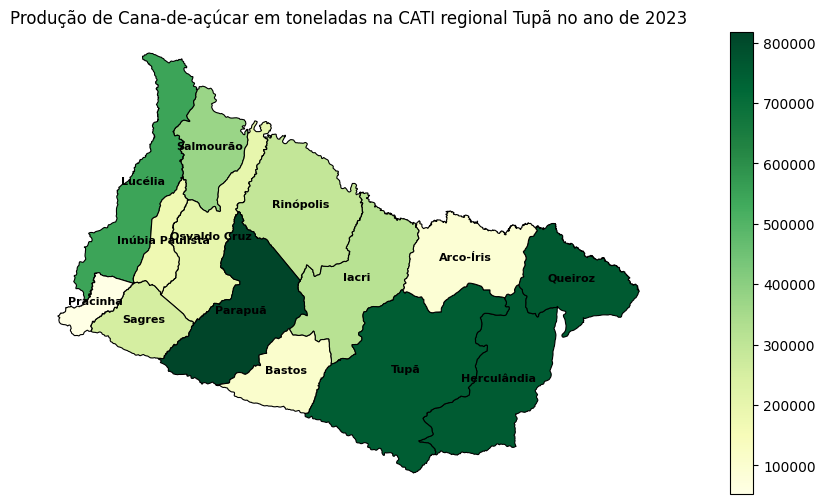

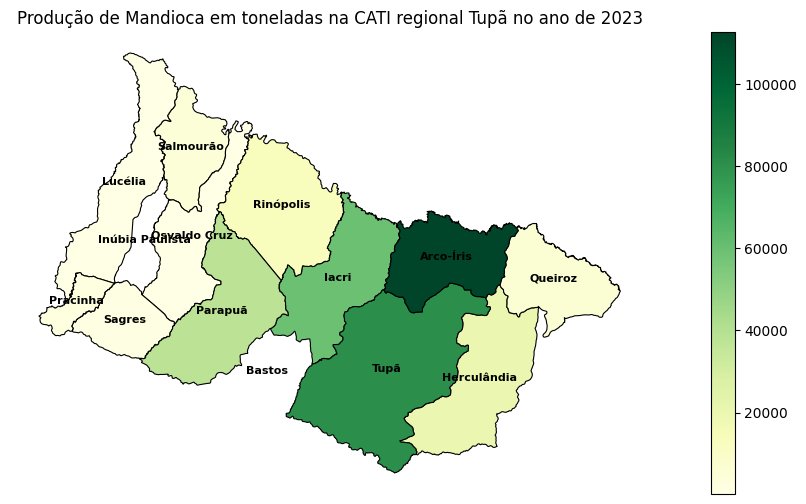

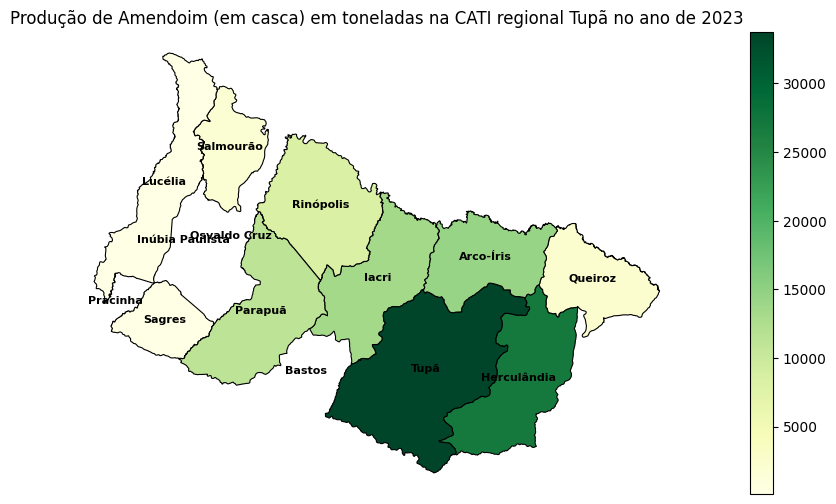

In [74]:


# Lista com os 14 municípios de interesse
municipios_interesse = [
    "Inúbia Paulista", "Bastos", "Tupã", "Herculândia", "Sagres",
    "Osvaldo Cruz", "Salmourão", "Arco-Íris", "Lucélia", "Queiroz",
    "Iacri", "Parapuã", "Rinópolis", "Pracinha"
]
# 1. Filtrar somente os 14 municípios
gdf_14 = gdf_pam[gdf_pam["NM_MUN"].isin(municipios_interesse)]
# 2. Filtrar apenas as culturas desejadas e o ano mais recente (exemplo: 2023)
culturas = ["Cana-de-açúcar", "Mandioca", "Amendoim (em casca)"]
gdf_14_culturas = gdf_14[
    (gdf_14["Produto das lavouras temporárias e permanentes"].isin(culturas)) &
    (gdf_14["Ano"] == 2023) &
    (gdf_14["Variável"] == "Quantidade produzida")
]
# 3. Plotar mapa coroplético para cada cultura
for cultura in culturas:
    fig, ax = plt.subplots(figsize=(16, 6)) #Aqui ele está plotando um mapa com as tres culturas 
    # Filtrar a cultura
    gdf_plot = gdf_14_culturas[gdf_14_culturas["Produto das lavouras temporárias e permanentes"] == cultura]
    # Plotar mapa
    gdf_plot.plot(
        column="Valor",
        cmap="YlGn", #mudar a cora da barra 
        legend=True,
        edgecolor="black",
        linewidth=0.8,
        ax=ax #Chamando as culturas
    )
    # Adicionar nomes dos municípios no centro de cada localização
    for idx, row in gdf_plot.iterrows():
        centroid = row["geometry"].centroid
        ax.annotate(
            text=row["NM_MUN"],
            xy=(centroid.x, centroid.y),
            ha="center",
            fontsize=8,
            color="black",
            weight="bold"
        )
    ax.set_title(f"Produção de {cultura} em toneladas na CATI regional Tupã no ano de 2023", fontsize=12)
    plt.axis("off") #exibição dos eixos 
    plt.show()
